# Task 2 : Uber Data Analysis 


# Import Libraries

In [132]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the Uber Data into a Pandas DataFrame

In [133]:
data = pd.read_csv(r"C:\Users\ABC\Desktop\All Taskss\Alfido\task2\dataset\UberDataset.csv")

In [134]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# EDA 

In [135]:
special_characters = r'[\?/\[\]!@#$%^&*]'

In [136]:
data['START'] = data['START'].str.replace(special_characters, '', regex=True)

In [137]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [138]:
data['START_DATE'] = data['START_DATE'].str.split(' ').str[0]
data['END_DATE'] = data['END_DATE'].str.split(' ').str[0]

In [139]:
# Remove "-" and "/" characters from 'START_DATE' and 'END_DATE' columns
data['START_DATE'] = data['START_DATE'].str.replace(r'[-/]', ' ', regex=True)
data['END_DATE'] = data['END_DATE'].str.replace(r'[-/]', ' ', regex=True)


In [140]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01 01 2016,01 01 2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01 02 2016,01 02 2016,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01 02 2016,01 02 2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01 05 2016,01 05 2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01 06 2016,01 06 2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [141]:
data.dropna(inplace=True)

In [142]:
data.reset_index(drop=True,inplace=True)

In [143]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01 01 2016,01 01 2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01 02 2016,01 02 2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,01 05 2016,01 05 2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,01 06 2016,01 06 2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,01 06 2016,01 06 2016,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [72]:
# Geocoding with geopy
geolocator = Nominatim(user_agent="uber_analysis")


# Function to obtain latitude and longitude for a location

In [74]:

def geocode_location(location):
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Geocoding error for location '{location}': {str(e)}")
        return None, None


In [75]:
# Assuming you've defined the 'geolocator' object
latitude, longitude = geocode_location("Fort Pierce")

if latitude is not None and longitude is not None:
    print(f"Latitude: {latitude}, Longitude: {longitude}")
else:
    print("Geocoding failed or location not found.")


Latitude: 27.4467056, Longitude: -80.3256056


In [76]:
# Basic data summary
print(data.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


# User behavior analysis

In [77]:
data['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

# Driver patterns analysis


In [78]:
data.groupby('CATEGORY')['MILES'].sum()

CATEGORY
Business    11487.0
Personal      717.7
Name: MILES, dtype: float64


# 1. Summary statistics

In [145]:
summary_stats = data.describe()

In [146]:
summary_stats

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


# 2. User behavior analysis

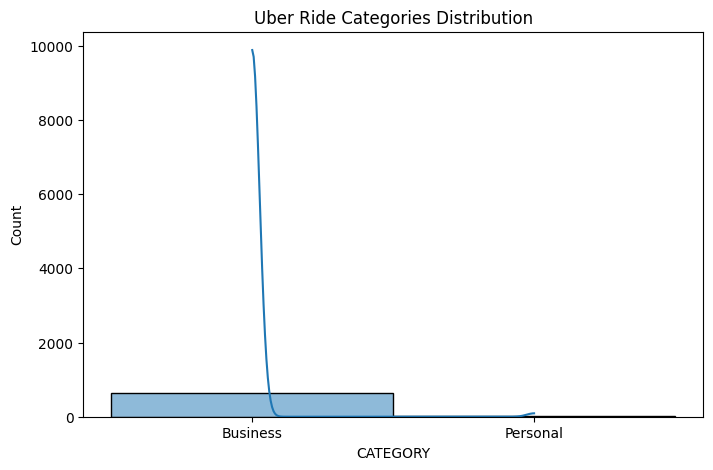

In [144]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='CATEGORY', bins=10, kde=True)
plt.title('Uber Ride Categories Distribution')
plt.show()

# 3. Driver patterns analysis

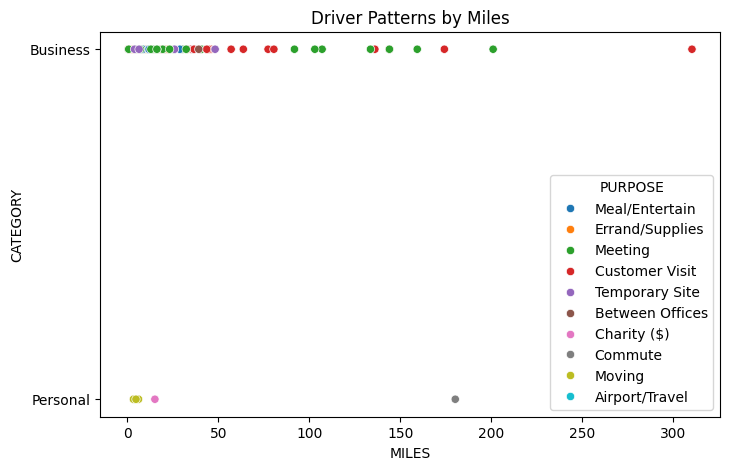

In [147]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MILES', y='CATEGORY', hue='PURPOSE')
plt.title('Driver Patterns by Miles')
plt.show()

# 4. Areas of high demand

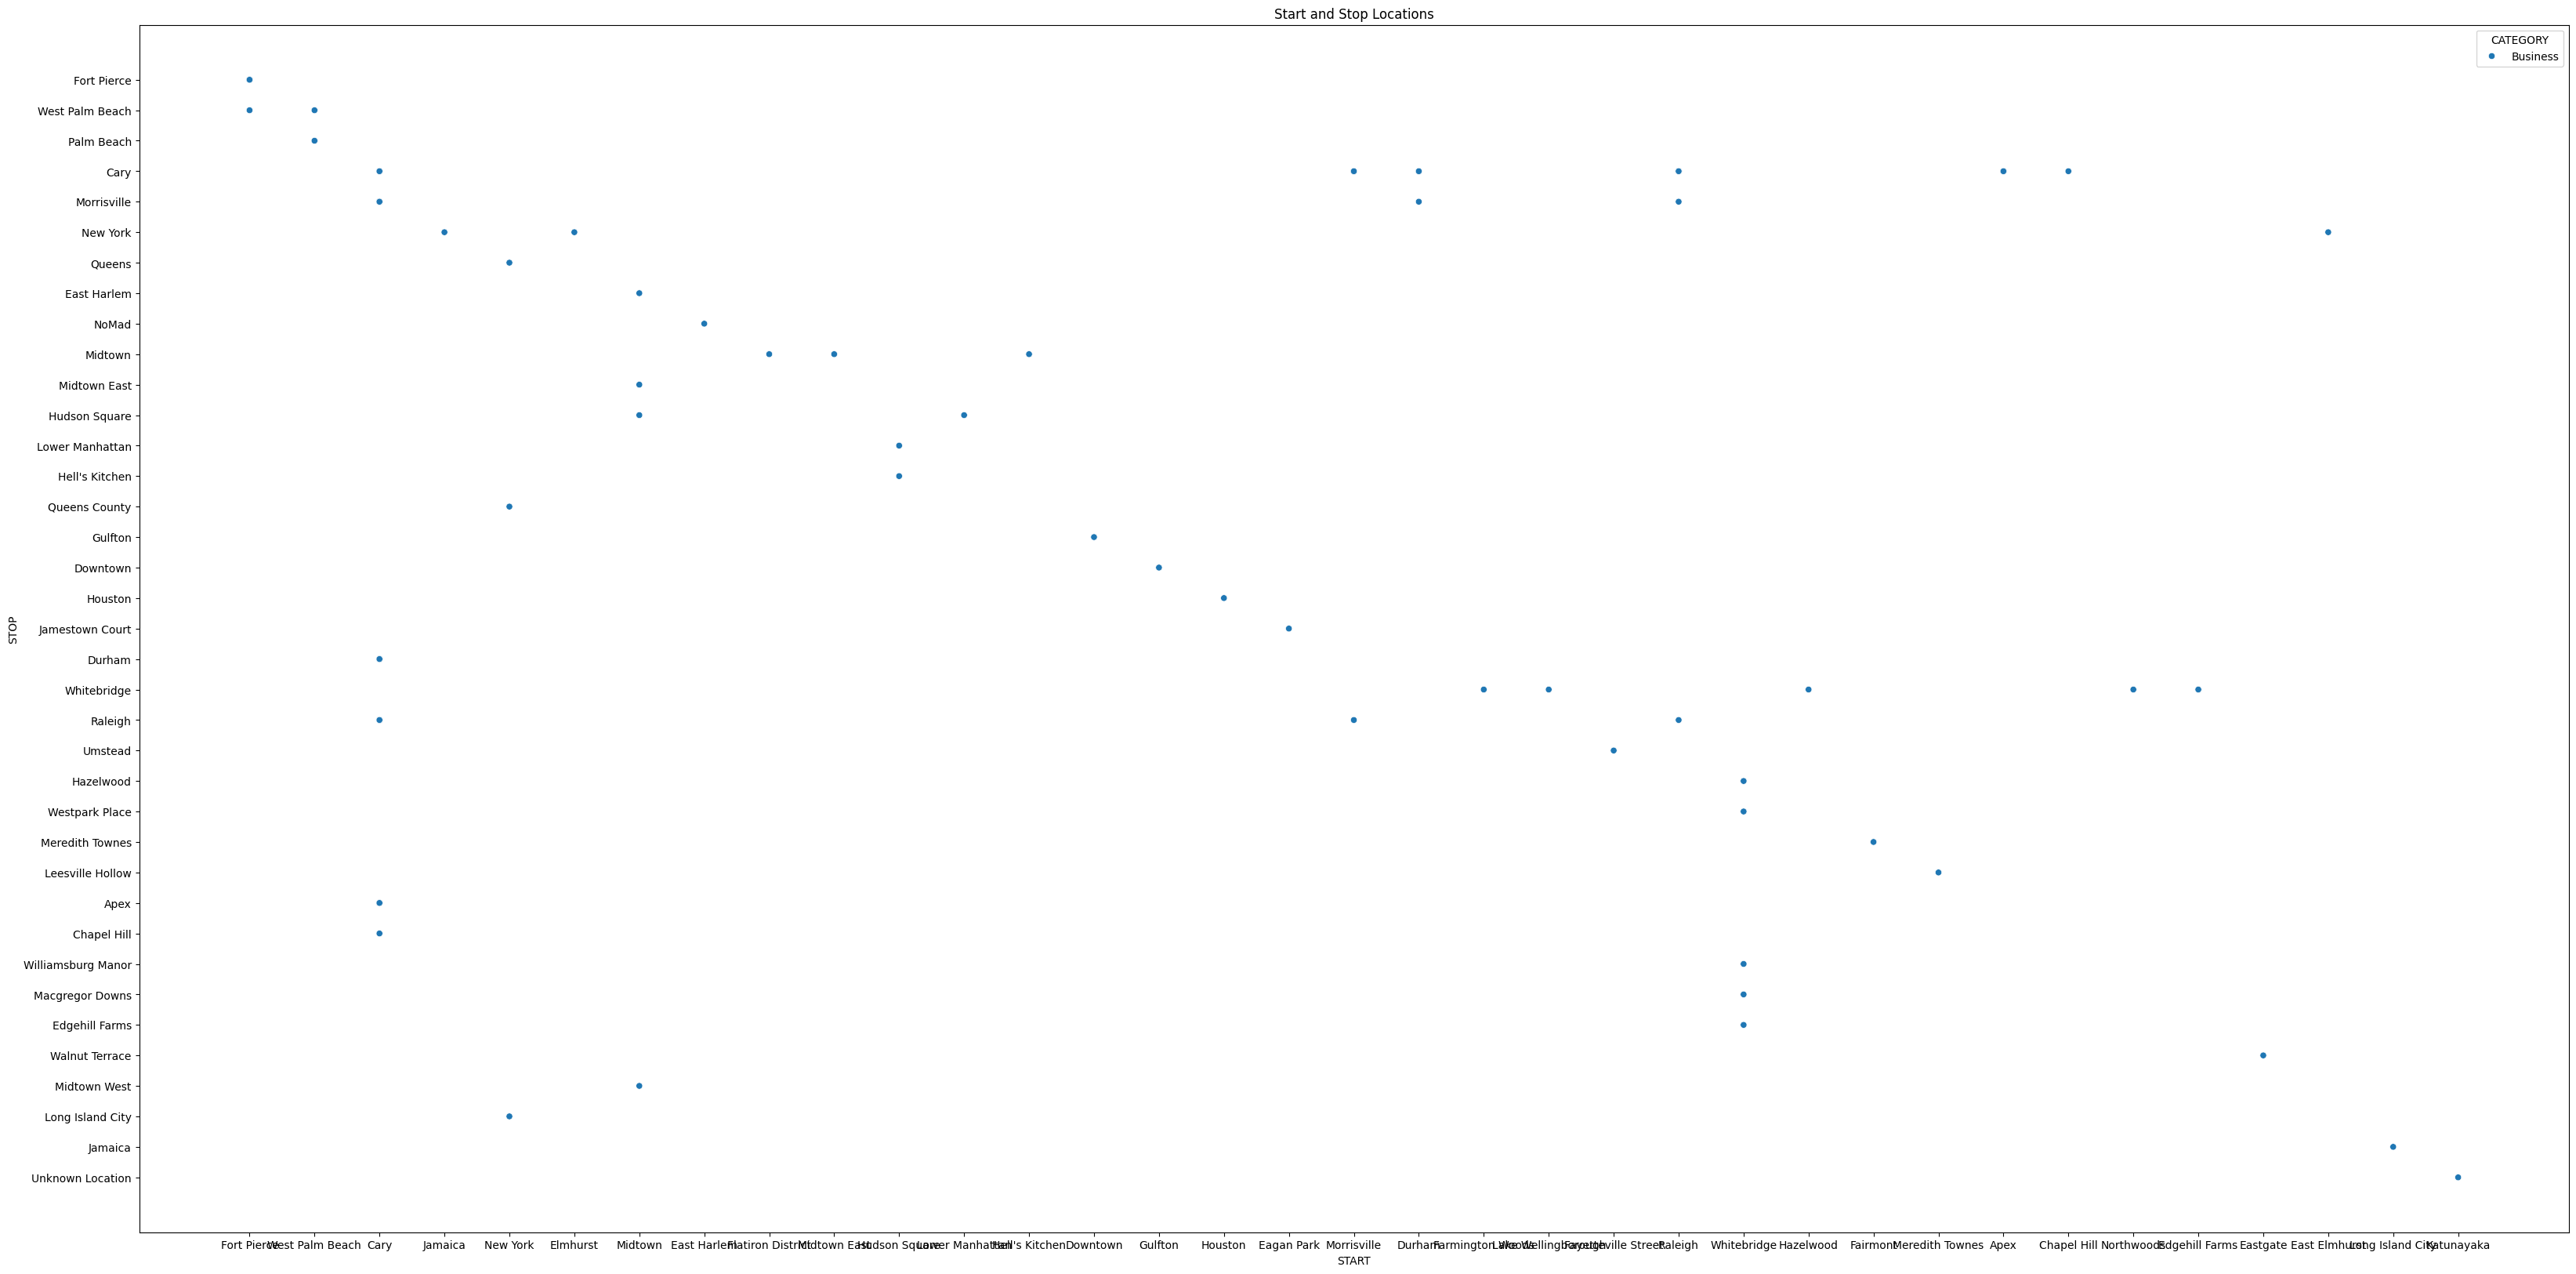

In [159]:
plt.figure(figsize=(40, 20))
sns.scatterplot(data=data.head(100), x='START', y='STOP', hue='CATEGORY')
plt.title('Start and Stop Locations')
plt.show()

# 5.Ride Frequency by Category


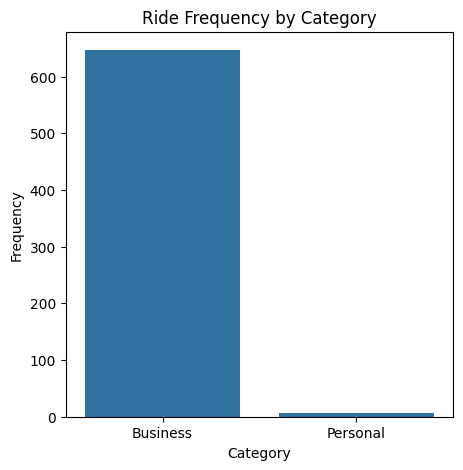

In [161]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='CATEGORY')
plt.title('Ride Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


# 6.Miles Distribution

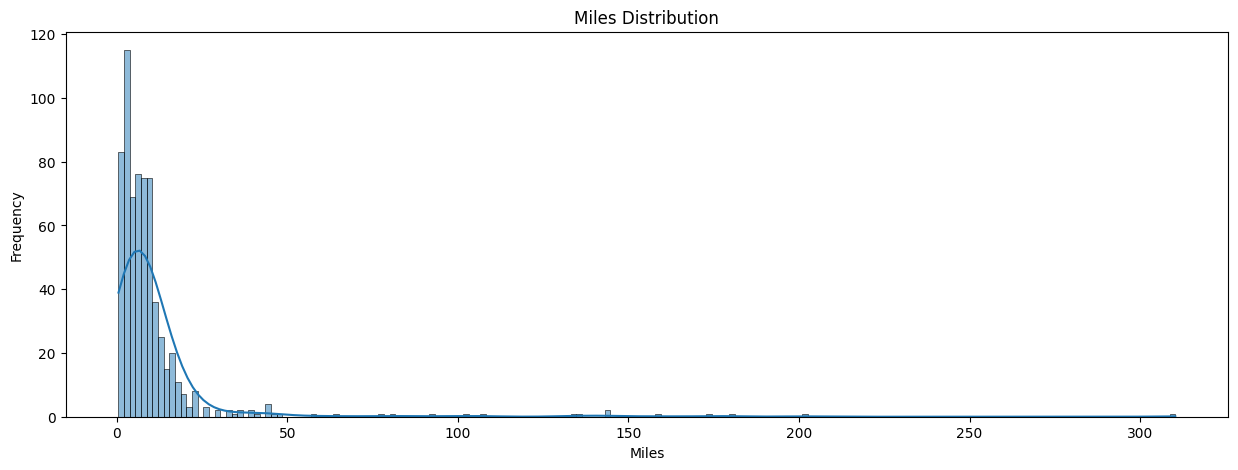

In [164]:
plt.figure(figsize=(15, 5))
sns.histplot(data=data, x='MILES', kde=True)
plt.title('Miles Distribution')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()


# 7.Purpose of Rides

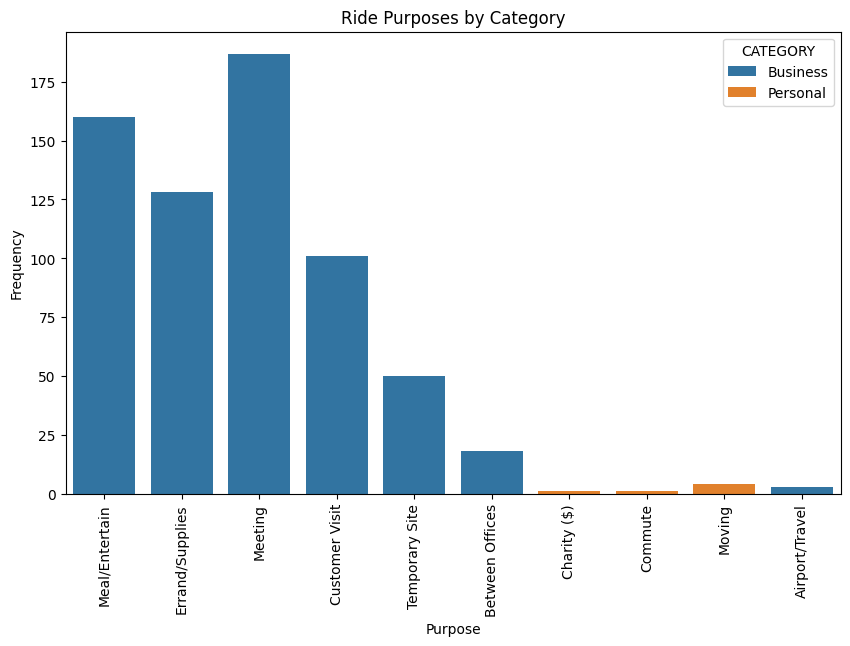

In [165]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PURPOSE', hue='CATEGORY')
plt.title('Ride Purposes by Category')
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()
